In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report 
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as make_pipeline_imb
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
import itertools
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score

In [2]:
df = pd.read_csv(r'C:\Users\Mahe\Desktop\Wildfire-Predictor\final.csv')
df=df.drop(columns=['Unnamed: 0'])
df.head()

,date,lat,lon,mask,lst,lstn,ndvi,vcr,prec,ma_cat
0,2019-06-02,39.737500,-122.295833,9.0,310.26000,290.921693,0.3108,0.59,0.718065,1
1,2019-06-10,39.737500,-122.295833,5.0,323.92000,290.921693,0.2526,0.59,0.000000,0
2,2019-06-18,39.737500,-122.295833,5.0,309.33877,297.900000,0.2526,0.59,0.000000,0
3,2019-06-02,39.729167,-122.295833,9.0,310.36000,290.921693,0.3198,0.57,0.718065,1
4,2019-06-10,39.729167,-122.295833,5.0,321.90000,290.921693,0.2670,0.57,0.000000,0


In [3]:
X = df[['vcr', 'lst','ndvi','lstn','prec']]   #.astype(float)
x=df[['vcr', 'lst','ndvi','lstn','prec']]
X[0:5]

,vcr,lst,ndvi,lstn,prec
0,0.59,310.26000,0.3108,290.921693,0.718065
1,0.59,323.92000,0.2526,290.921693,0.000000
2,0.59,309.33877,0.2526,297.900000,0.000000
3,0.57,310.36000,0.3198,290.921693,0.718065
4,0.57,321.90000,0.2670,290.921693,0.000000


In [4]:
y = df['ma_cat']
y[0:5]

0    1
1    0
2    0
3    1
4    0
Name: ma_cat, dtype: int64

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [6]:
clf=RandomForestClassifier(n_estimators=75)

# Before SMOTE

In [7]:
clf.fit(X_train,y_train)

RandomForestClassifier()

In [8]:
y_pred=clf.predict(X_test)

In [9]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9562937062937062


In [10]:
feature_imp = pd.Series(clf.feature_importances_,index=x.columns.values).sort_values(ascending=False)
feature_imp

ndvi    0.295851
lst     0.231860
prec    0.212467
vcr     0.146768
lstn    0.113054
dtype: float64

In [11]:
import collections
ctr = collections.Counter(y_pred)
ctr

Counter({0: 565, 1: 7})

In [12]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       542
           1       0.86      0.20      0.32        30

    accuracy                           0.96       572
   macro avg       0.91      0.60      0.65       572
weighted avg       0.95      0.96      0.94       572



In [12]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, y_pred, labels=[1,0]))

In [ ]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['mask=1','mask=0'],normalize= False,  title='Confusion matrix')

# After SMOTE

In [7]:
smt = SMOTE()
X_train, y_train = smt.fit_sample(X_train, y_train)

In [8]:
print(sum(y_train == 1))
print(sum(y_train == 0))


1263
1263


In [9]:
clf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=75)

In [10]:
y_pred=clf.predict(X_test)

In [11]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9213286713286714


In [19]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       542
           1       0.49      0.63      0.55        30

    accuracy                           0.95       572
   macro avg       0.73      0.80      0.76       572
weighted avg       0.95      0.95      0.95       572



Confusion matrix, without normalization
[[ 24  15]
 [ 30 503]]


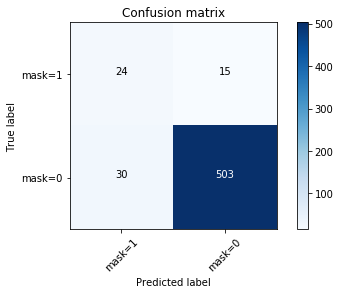

In [13]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['mask=1','mask=0'],normalize= False,  title='Confusion matrix')

In [14]:
rf_probs = clf.predict_proba(X_test)

In [15]:
rf_probs = rf_probs[:, 1]

In [16]:
prec, rec, _ = precision_recall_curve(y_test, rf_probs)
f1 = f1_score(y_test, y_pred) 

In [17]:
au = auc(rec, prec)
print('Random Forest: f1=%.3f auc=%.3f' % (f1, au))

Random Forest: f1=0.516 auc=0.414


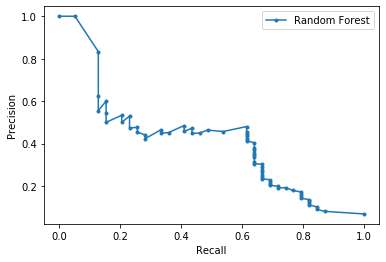

In [19]:
plt.plot(rec, prec, marker='.', label='Random Forest')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()